# Telling the History of a District with Open Data

**Data** taken from: 

* Main Dataset - containing all the informations about the buildings:

https://www.data.gv.at/katalog/dataset/wien-geschichte-wiki/resource/a230cfe8-95d9-474a-9436-fe6659a4e40d

* Boundaries of the 7th district:

https://www.data.gv.at/katalog/dataset/stadt-wien_bezirksgrenzenwien

## Step 0: Load Libraries & Data

in the following code chunks we are:

* loading the necessary libraries and the dataset
* looking at some sample rows

In [1]:
#standard libraries
import os
import pandas as pd
import numpy as np
import regex as re

#for visuals
import matplotlib.pyplot as plt
import seaborn as sns

#for webscraping
from urllib.request import urlopen

In [2]:
df = pd.read_csv('../data/KULTURWIKIOGD.csv')

In [3]:
df.head(3)

,FID,OBJECTID,SHAPE,ADRESSE,ANDERE_BEZEICHNUNG,ART_DER_ORGANISATION,ART_DES_BAUWERKS,ART_DES_EREIGNISSES,ART_DES_OBJEKTS,BENANNT_NACH,...,KATEGORIE_TXT,LAGE,NAME_SEIT,PAGEID,PROMINENTE_BEWOHNER,PROMINENTE_PERSONEN,SEITENNAME,STADTPLAN,WEBLINK1,SE_ANNO_CAD_DATA
0,KULTURWIKIOGD.fid-52c6621a_186c0bfb22a_-7e62,294006,POINT (16.244504291918773 48.207665864191334),"14., Mondweg 91",NaN,NaN,NaN,NaN,Grünfläche,Franz Sauer,...,topografische_objekte,Wolfersberg,NaN,24895,NaN,NaN,Franz-Sauer-Park,1,https://www.geschichtewiki.wien.gv.at/?curid=2...,NaN
1,KULTURWIKIOGD.fid-52c6621a_186c0bfb22a_-7e61,294007,POINT (16.258101639280678 48.19710480431093),"13., Rußpekgasse 3",NaN,NaN,NaN,NaN,Grünfläche,Franz Schimon,...,topografische_objekte,Hacking,NaN,45236,NaN,NaN,Franz-Schimon-Park,1,https://www.geschichtewiki.wien.gv.at/?curid=4...,NaN
2,KULTURWIKIOGD.fid-52c6621a_186c0bfb22a_-7e60,294008,POINT (16.2606861380513 48.18231434166762),"13., Schweizertalstraße 29D",NaN,NaN,NaN,NaN,Grünfläche,Franz Schmidt,...,topografische_objekte,NaN,NaN,31479,NaN,NaN,Franz-Schmidt-Park,1,https://www.geschichtewiki.wien.gv.at/?curid=3...,NaN


In [4]:
df.shape

(15597, 27)

## Step 1: First Analysis & Filter

In the following code chunks we are:

* creating a column for the district and one for the street out of the existing
  "adresse" which contains both information
* counting the number of objects per district

In [5]:
df['DISTRICT'] = df['ADRESSE'].str[0:2]
df['STREET'] = df['ADRESSE'].str[5:]

In [6]:
pd.DataFrame(df.sort_values(by=['DISTRICT'])['DISTRICT'].value_counts(sort=False)).style

,DISTRICT
01,2573
02,888
03,852
04,369
05,277
06,386
07,350
08,308
09,558
10,787


In [7]:
df_filtered = df[df['DISTRICT'] == '07']
pd.DataFrame(df_filtered.count()).style

,0
FID,350
OBJECTID,350
SHAPE,350
ADRESSE,350
ANDERE_BEZEICHNUNG,30
ART_DER_ORGANISATION,30
ART_DES_BAUWERKS,139
ART_DES_EREIGNISSES,1
ART_DES_OBJEKTS,85
BENANNT_NACH,113


Since we see that all of the feature names are German - we translate them to english:

In [8]:
column_names = {
    'FID': 'fid',
    'OBJECTID': 'objectid',
    'SHAPE': 'shape',
    'ADRESSE': 'address',
    'ANDERE_BEZEICHNUNG': 'other_name',
    'ART_DER_ORGANISATION': 'type_of_organization',
    'ART_DES_BAUWERKS': 'type_of_structure',
    'ART_DES_EREIGNISSES': 'type_of_event',
    'ART_DES_OBJEKTS': 'kind_of_object',
    'BENANNT_NACH': 'named_by',
    'BEZIRK': 'district',
    'BEZIRK_TXT': 'district_txt',
    'DATUM_BIS': 'date_of_destruction',
    'DATUM_VON': 'date_of_origin',
    'EINLAGEZAHL': 'insertion_number',
    'FRUEHERE_BEZEICHNUNG': 'former_designation',
    'KATEGORIE': 'category',
    'KATEGORIE_TXT': 'category_txt',
    'LAGE': 'location',
    'NAME_SEIT': 'name_page',
    'PAGEID': 'pageid',
    'PROMINENTE_BEWOHNER': 'celebrities_residents',
    'PROMINENTE_PERSONEN': 'celebrities_persons',
    'SEITENNAME': 'page_name',
    'STADTPLAN': 'city_plan',
    'WEBLINK1': 'weblink1',
    'SE_ANNO_CAD_DATA': 'se_anno_cad_data',
    'DISTRICT': 'district',
    'STREET': 'street'
}

df_filtered = df_filtered.rename(columns=column_names)
pd.DataFrame(df_filtered.count()).style

,0
fid,350
objectid,350
shape,350
address,350
other_name,30
type_of_organization,30
type_of_structure,139
type_of_event,1
kind_of_object,85
named_by,113


In [9]:
for column in df_filtered.columns:
        non_missing_values = df_filtered[column].dropna()
        if len(non_missing_values) > 0:
            example_value = non_missing_values.iloc[0]
            print(f"{column}: {example_value}")

fid: KULTURWIKIOGD.fid-52c6621a_186c0bfb22a_-7e1b
objectid: 293864
shape: POINT (16.345987015649527 48.201070040884055)
address: 07., Bandgasse 6
other_name: Ziegelofengasse
type_of_organization: Sonstiges
type_of_structure: Sakralbau
type_of_event: Anschlag
kind_of_object: Grätzel
named_by: Reichtum der ansässigen Handwerker
district: district    7.0
district     07
Name: 71, dtype: object
district_txt: 7
date_of_destruction: 19330323000000.0
date_of_origin: 1750.0
insertion_number: 1088
former_designation: Herrengasse
category: 0
category_txt: TopografischeObjekte
location: Schottenfeld
name_page: 1862
pageid: 7537
celebrities_residents: Max Devrient
celebrities_persons: Cilli Löwinger,Paul Löwinger (senior),Sissy Löwinger,Willy Birgel,Heinz Rühmann,Max Böhm,Heinz Conrads,Ernst Waldbrunn,Adolf Lehner (Zirkusdirektor)
page_name: Brillantengrund
city_plan: 1
weblink1: https://www.geschichtewiki.wien.gv.at/?curid=7537
district: district    7.0
district     07
Name: 71, dtype: object
str

Next we are

* looking at the row with the least missing values to find out more about what the different column contain
* dropping unnessary columns
* looking at some summary graphics to gains some insights about the data

In [10]:
df_filtered[df_filtered.isnull().sum(axis=1) == min(df_filtered.isnull().sum(axis=1))].head(1).style

,fid,objectid,shape,address,other_name,type_of_organization,type_of_structure,type_of_event,kind_of_object,named_by,district,district_txt,date_of_destruction,date_of_origin,insertion_number,former_designation,category,category_txt,location,name_page,pageid,celebrities_residents,celebrities_persons,page_name,city_plan,weblink1,se_anno_cad_data,district,street
2021,KULTURWIKIOGD.fid-52c6621a_186c0bfb22a_-767d,290160,POINT (16.351523540077157 48.20555287080875),"07., Neustiftgasse 30",nan,nan,nan,nan,Verkehrsfläche,Georg Kellermann,7.000000,7,nan,1910.000000,nan,Schottenhofgasse,0,TopografischeObjekte,nan,20 Mai 1910,3419,Max Devrient,nan,Kellermanngasse,1,https://www.geschichtewiki.wien.gv.at/?curid=3419,nan,07,Neustiftgasse 30


In [11]:
df_filtered = df_filtered.drop(columns=['fid', 'objectid', 'address', 'district', 'district_txt',
                                        'insertion_number', 'former_designation', 'category', 'location', 'pageid', 'city_plan',
                                        'celebrities_residents', 'celebrities_persons', 'se_anno_cad_data',
                                         'named_by', 'name_page', 'other_name'], inplace=False)


In [12]:
df_filtered.shape

(350, 11)

<AxesSubplot:>

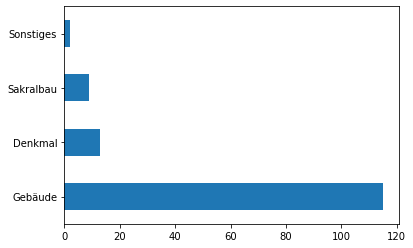

In [13]:
df_filtered.type_of_structure.value_counts().plot(kind='barh')

<AxesSubplot:>

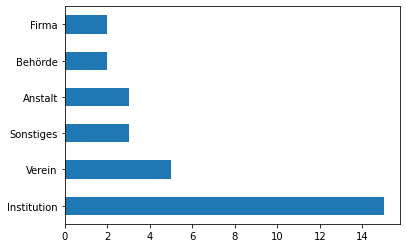

In [14]:
df_filtered.type_of_organization.value_counts().plot(kind='barh')

<AxesSubplot:>

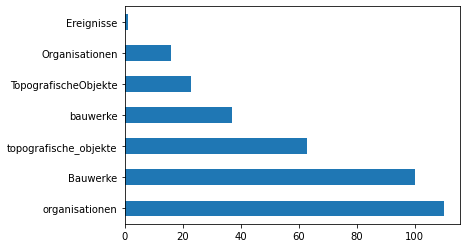

In [15]:
df_filtered.category_txt.value_counts().plot(kind='barh')

### Step 1.1: Analysis of Missing Values

Next we are looking at some summary statistics on the number of values that 
we have available for the different columns in our data set.

In [164]:
def visualize_missing_values(dataframe):
    """
    method to visualize the number of missing and available values per column
    """
    numer_of_na = dataframe.isnull().sum(axis = 0)
    numer_of_na = numer_of_na.to_frame()

    numer_of_a = dataframe.notnull().sum(axis = 0)
    numer_of_a = numer_of_a.to_frame()

    index = numer_of_na

    #specify resolution
    plt.figure(figsize=(14, 3), dpi=120)

    #print bars
    plt.bar(numer_of_na.index, height=numer_of_a[0], color='#6ce083', label='Available')
    plt.bar(numer_of_na.index, bottom=numer_of_a[0], height=numer_of_na[0], color='#ededed', label='Not Available')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1.17), ncol=2)
    plt.title('Overview of Missing Values', loc='left')

    #show values of bars
    for index, value in enumerate(numer_of_a[0]):
        plt.text(index, value, str(value),  ha='left', va='top',)

    #label the plot
    plt.xlabel('Features')
    plt.ylabel('Number of Available Data Records')

    #rotate x labels
    _ = plt.xticks(rotation=30)


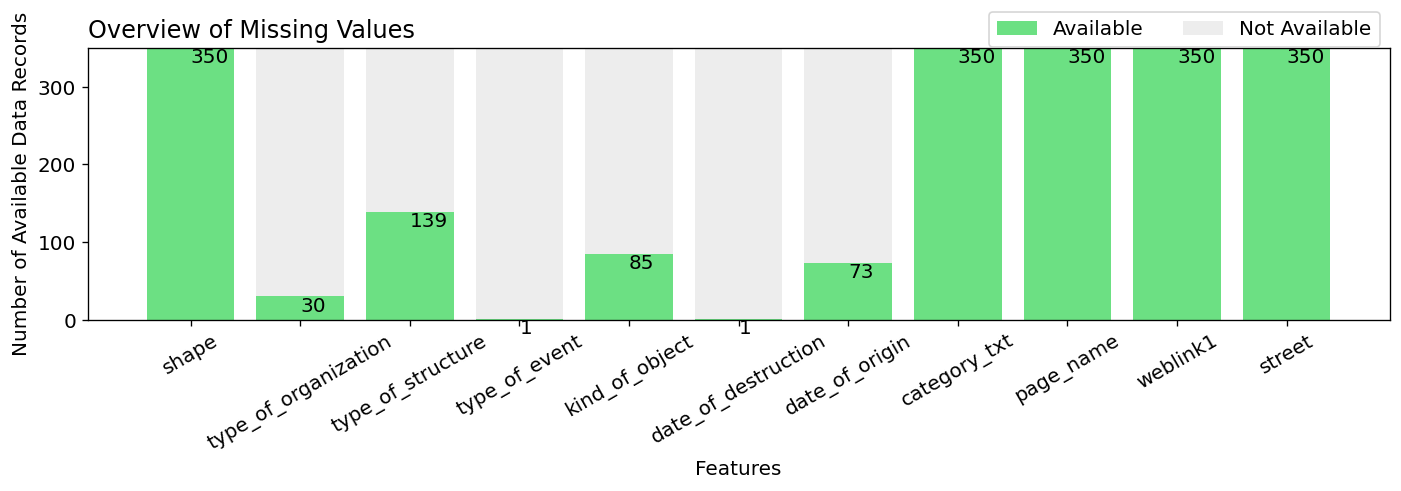

In [167]:
# set main font size for matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
visualize_missing_values(df_filtered)

# Save the figure with minimal white space
plt.savefig('./plots/missing_values_before_webscraping.pdf', format='pdf', bbox_inches='tight')

In [38]:
print("available records: ", df_filtered.notnull().sum(axis = 0).sum())
print("missing values: ", df_filtered.isnull().sum(axis = 0).sum())

available records:  2079
missing values:  1771


## Step 2: Extending the Dataset by Webscraping

The analysis in the last step showed that a range of essential values appear to be missing.

Luckily I found out that the information on some missing values is available on the Wien wiki website.

That is why we are now scraping the wien wiki website for the different pages on the different objects.

In [39]:
def look_up_facts(url):
    """ 
    method that takes as input
    a link to a page of wien wiki
    and return information (date of the object, etc.)
    that can be found on the webpage
    """
    try:
        # try to open the page
        page = urlopen(url)
    except:
        return None, None, None

    #read html and convert it to a string
    html_bytes = page.read()
    html = str(html_bytes.decode("utf-8"))

    #find the start year
    marker = '<td><span class="smw-property nolink">'
    position = html.find(marker+'Datum von')
    try:
        year_begin = int(html[position:position+69][-4:])
    except:
        if "ersten Bauphase des Spittelbergviertels" in html:
            year_begin = 1725
        else:
            year_begin = None
            #if "Jahrhundert" in html[:html.find('id="Literatur">')]: 
                #try:
                 #   century = re.findall(r"\d+...Jahrhundert",html)[0]
                 #   century = re.findall(r"\d+",century)[0]
                  #  year_begin = (int(century)*100)-100

                  #  if "zweite Hälfte" in html or "Ende des" in html:
                   #     year_begin += 50
                #except:
                   # year_begin = None
            
           # else:
              #  year_begin = None

    #find the end year
    position = html.find(marker+'Datum bis')
    try:
        year_end = int(html[position:position+69][-4:])
    except:
        year_end = None

    #find the type of object
    position = html.find(marker+'Art')
    object_type = html[position:position+150]
    
    if 'title=' in object_type:
        object_type = object_type[object_type.find('title='):object_type.find('&amp;')]
        object_type = re.sub('<.*>|"|<.*|>.*|\\|\n|\\n|title=', "", object_type).strip()
    else:
        object_type = None

    return year_begin, year_end, object_type


print(look_up_facts('https://www.geschichtewiki.wien.gv.at/Wien_Geschichte_Wiki?curid=12421'))
print(look_up_facts('https://www.geschichtewiki.wien.gv.at/?curid=25703'))
print(look_up_facts('https://www.geschichtewiki.wien.gv.at/?curid=69557'))




(1783, None, 'Apotheke')
(None, None, 'Sakrale_Freiplastik')
(None, None, 'Verlag')


In [40]:
%%capture
row_counter=0
import numpy as np

#creating a copy to get a d
df_extended = df_filtered.copy()

df_extended['OBJECTTYPE'] = ''

for i in df_extended.iterrows():
    
    #look up the information on the web
    year_begin, year_end, object_type  = look_up_facts(df_extended['weblink1'].iloc[row_counter])

    if year_begin != None and np.isnan(df_extended['date_of_origin'].iloc[row_counter]):
        df_extended['date_of_origin'].iloc[row_counter] = year_begin

    if year_end != None and np.isnan(df_extended['date_of_destruction'].iloc[row_counter]):
        df_extended['date_of_destruction'].iloc[row_counter] = year_end

    df_extended['OBJECTTYPE'].iloc[row_counter] = object_type
        
    row_counter +=1

In [106]:
numer_of_a_before

,0
shape,350
type_of_organization,30
type_of_structure,139
type_of_event,1
kind_of_object,85
date_of_destruction,1
date_of_origin,73
category_txt,350
page_name,350
weblink1,350


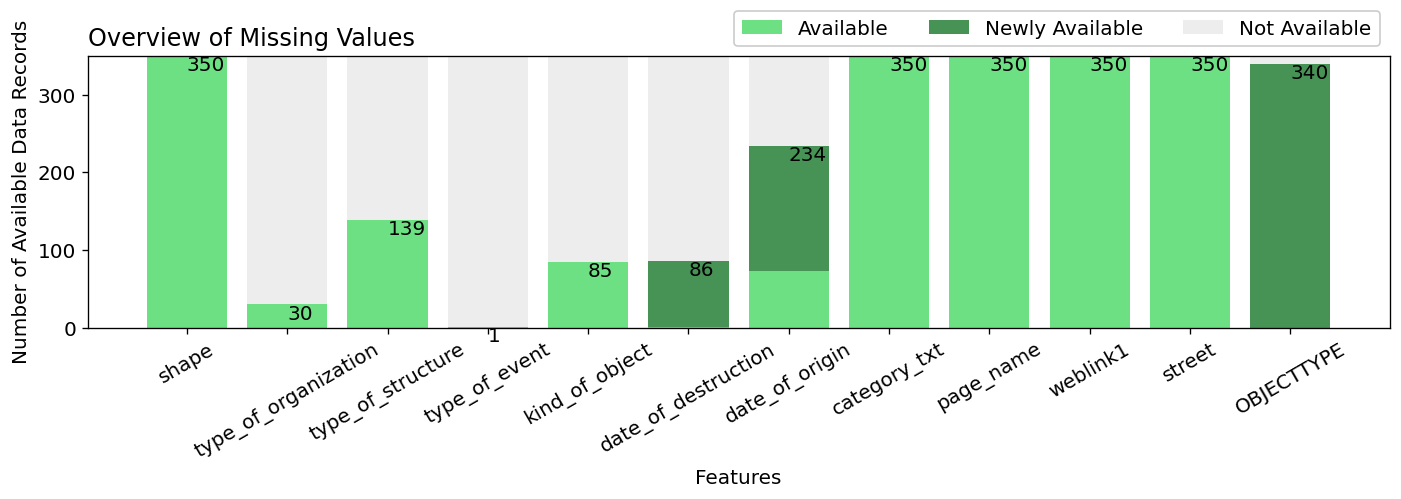

In [166]:
import numpy as np

# Create a copy of df_filtered and add the column "OBJECTTYPE" with a value of 0
df_filtered_copy = df_filtered.copy()
df_filtered_copy["OBJECTTYPE"] = np.nan

# Sort the column names of df_filtered_copy and df_extended to ensure they are in the same order
df_extended_sorted = df_extended.copy().reindex(df_extended.columns, axis=1)
df_filtered_copy = df_filtered_copy.reindex(df_extended.columns, axis=1)

# Calculate the number of available values for df_filtered_copy, df_extended, and newly available values
numer_of_a_before = df_filtered_copy.notnull().sum(axis=0)
numer_of_a_before = numer_of_a_before.to_frame()

numer_of_new_a = df_extended_sorted.notnull().sum(axis=0)
numer_of_new_a = numer_of_new_a.to_frame() - numer_of_a_before

# Calculate the number of missing values in df_extended
numer_of_na = df_extended_sorted.isnull().sum(axis=0)
numer_of_na = numer_of_na.to_frame()

index = numer_of_na

# Specify resolution
plt.figure(figsize=(14, 3), dpi=120)

# Print bars for newly available, available, and not available values

plt.bar(numer_of_na.index, height=numer_of_a_before[0], color='#6ce083', label='Available')
plt.bar(numer_of_na.index, bottom=numer_of_a_before[0], height=numer_of_new_a[0], color='#479356', label='Newly Available')
plt.bar(numer_of_na.index, bottom=numer_of_a[0], height=numer_of_na[0], color='#ededed', label='Not Available')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2), ncol=3, facecolor='white', framealpha=1)

# Show values of bars
for index, value in enumerate(numer_of_a[0]):
    plt.text(index, value, str(value), ha='left', va='top')

# Label the plot
plt.title('Overview of Missing Values', loc='left')
plt.xlabel('Features')
plt.ylabel('Number of Available Data Records')

# Rotate x labels
_ = plt.xticks(rotation=30)

# Save the figure with minimal white space
plt.savefig('./plots/missing_values_after_webscraping.pdf', format='pdf', bbox_inches='tight')


In [22]:
print("available records: ", df_filtered.notnull().sum(axis = 0).sum())
print("missing values: ", df_filtered.isnull().sum(axis = 0).sum())

available records:  2079
missing values:  1771


## Step 3: Cleaning the Data & Second Round of Analysis

In [23]:
%%capture
row_counter = 0

df_extended['TYPE'] = ''

for i in df_extended.iterrows():
    

    if df_extended['type_of_organization'].iloc[row_counter] != '' and str(df_extended['type_of_organization'].iloc[row_counter]) != 'nan':
        df_extended['TYPE'].iloc[row_counter] = df_extended['type_of_organization'].iloc[row_counter]
    
    else:

        if df_extended['OBJECTTYPE'].iloc[row_counter] != '' and str(df_extended['OBJECTTYPE'].iloc[row_counter]) != 'nan':
            df_extended['TYPE'].iloc[row_counter] = df_extended['OBJECTTYPE'].iloc[row_counter]
        
        else:
            if str(df_extended['type_of_event'].iloc[row_counter]) != 'nan':
                df_extended['TYPE'].iloc[row_counter] = df_extended['type_of_event'].iloc[row_counter]
                df_extended['date_of_origin'].iloc[row_counter]  = int(str(df_extended['date_of_destruction'].iloc[row_counter])[:4])
                df_extended['date_of_destruction'].iloc[row_counter]  = 0
            
            else:
                df_extended['TYPE'].iloc[row_counter] = df_extended['category_txt'].iloc[row_counter]
                print(df_extended['category_txt'].iloc[row_counter])

    #print(str(df_extended['TYPE'].iloc[row_counter]).lower())
    if  str(df_extended['TYPE'].iloc[row_counter]).lower() == 'sonstiges':

        object_type = df_extended['page_name'].iloc[row_counter]
        df_extended['TYPE'].iloc[row_counter] = object_type[object_type.find('('):object_type.find(')')][1:].replace('7,', '')
    
    if  str(df_extended['TYPE'].iloc[row_counter]).lower() == 'bauwerke':
        print('yes')
        df_extended['TYPE'].iloc[row_counter] = 'Denkmal'
        
    row_counter +=1

In [49]:
print("available records: ", df_extended.drop(columns = ['TYPE', 'OBJECTTYPE']).copy().notnull().sum(axis = 0).sum())
print("missing values: ", df_extended.drop(columns = ['TYPE', 'OBJECTTYPE']).copy().isnull().sum(axis = 0).sum())

available records:  2325
missing values:  1525


In [55]:
df_extended.shape

(350, 13)

### Aggregate and Correct Data

<AxesSubplot:>

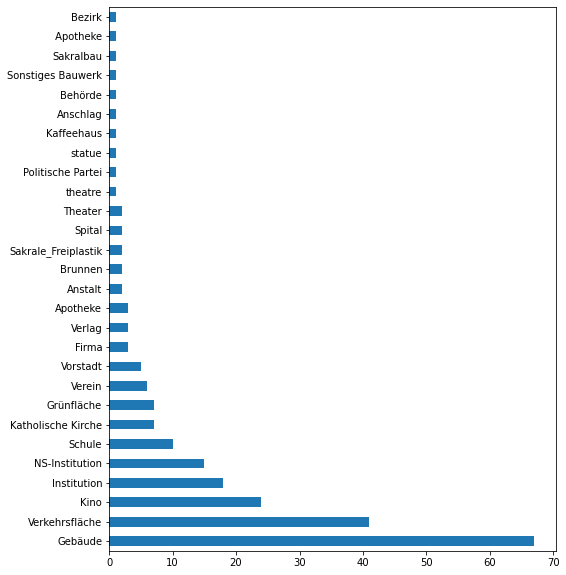

In [114]:


aggregated_df = df_extended[['page_name', 'TYPE', 'date_of_origin', 'date_of_destruction', 
                              'street', 'shape', 'weblink1']].copy()

aggregated_df['date_of_origin'] = aggregated_df['date_of_origin'].fillna(0).astype('int64', errors='ignore')
aggregated_df['date_of_destruction'] = aggregated_df['date_of_destruction'].fillna(0).astype('int64', errors='ignore')


aggregated_df.loc[df_extended["page_name"].str.contains("Volkstheater", case=False), "date_of_origin"] = 1889
aggregated_df.loc[df_extended["page_name"].str.contains("Volkstheater", case=False), "TYPE"] = "theatre"
aggregated_df.loc[df_extended["page_name"].str.contains("Rosse", case=False), "TYPE"] = "statue"

aggregated_df = aggregated_df.drop(aggregated_df[aggregated_df.date_of_origin == 0].index)


aggregated_df.TYPE.value_counts().plot(kind='barh',figsize=(8,10))

In [129]:

aggregated_df.reset_index(inplace=True)
aggregated_df.drop("index", axis=1, inplace=True)

#aggregating
aggregated_df["TYPE"].replace("^Sakrale_Freiplastik|Denkmal", "statue", regex=True, inplace=True)
aggregated_df["TYPE"].replace("Katholische Kirche", "church", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^Spital|.*Apotheke.*", "health_institution", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^Sonstiges Bauwerk|Gebäude", "building", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^Institution|^Verein", "building", regex=True, inplace=True)


#translating
aggregated_df["TYPE"].replace("Kino", "cinema", regex=True, inplace=True)
aggregated_df["TYPE"].replace("Kaffeehaus", "coffee_house", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^Grünfläche", "park", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^Schule", "school", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^NS-Institution", "NS_institution", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^Vorstadt", "settlement", regex=True, inplace=True)
aggregated_df["TYPE"].replace("^Theater", "theatre", regex=True, inplace=True)


aggregated_df.replace("ä", "ae", regex=True, inplace=True)
aggregated_df.replace("ö", "oe", regex=True, inplace=True)
aggregated_df.replace("ü", "ue", regex=True, inplace=True)
aggregated_df.replace("è", "e", regex=True, inplace=True)
aggregated_df.replace("é", "e", regex=True, inplace=True)
aggregated_df.replace("á", "a", regex=True, inplace=True)
aggregated_df.replace("â", "a", regex=True, inplace=True)
aggregated_df.replace("à", "a", regex=True, inplace=True)
aggregated_df.replace("ß", "ss", regex=True, inplace=True)



### Correction of Types & Removing Unwanted Objects 

In [131]:
#correcting values
aggregated_df.loc[aggregated_df['page_name'].str.contains("cafe", case=False), "TYPE"] = "coffee_house"
aggregated_df.loc[aggregated_df['page_name'].str.contains("spital", case=False), "TYPE"] = "health_institution"
aggregated_df.loc[aggregated_df['page_name'].str.contains("denkmal", case=False), "TYPE"] = "statue"


#removing
aggregated_df["TYPE"].replace('''^Verkehrsflaeche|^district|^Gruenfläche|^Politische Partei|^Behoerde|^Ort
            |Insel|.*Topografi.*|^Ort|Bezirk|^Anstalt|^Sakralbau|Anschlag|Brunnen|^Verlag|^Firma''', "unwanted", regex=True, inplace=True)
aggregated_df = aggregated_df[aggregated_df.TYPE != "unwanted"].copy()


aggregated_df = aggregated_df.drop_duplicates(subset='page_name', keep='first')



aggregated_df.loc[(aggregated_df['page_name'].str.contains("hof", case=False)) &
                  (aggregated_df['date_of_origin']<1700), "TYPE"] = "farm"

In [132]:
# https://www.geschichtewiki.wien.gv.at/Neudeggerhof
aggregated_df.loc[aggregated_df["page_name"] == "Neudeggerhof", "date_of_destruction"] = 1770

aggregated_df.loc[(aggregated_df['page_name'].str.contains("hof", case=False)) & (aggregated_df['date_of_origin']<1700)]

,page_name,TYPE,date_of_origin,date_of_destruction,street,shape,weblink1,LONG,LAT
50,Berchtesgadner Hof,farm,1333,1529,Burggasse 22,POINT (16.352930991859658 48.20440306441252),https://www.geschichtewiki.wien.gv.at/?curid=3...,16.352931,48.204403
61,Oberhof,farm,1629,1788,Neustiftgasse 30,POINT (16.35165044544807 48.20558045755067),https://www.geschichtewiki.wien.gv.at/?curid=2...,16.351650,48.205580
74,"Schottenhof (7, Neustiftgasse 30-36)",farm,1629,1788,Neustiftgasse 30,POINT (16.351678276390583 48.20551992939218),https://www.geschichtewiki.wien.gv.at/?curid=1...,16.351678,48.205520
79,Neudeggerhof,farm,1376,1770,Lerchenfelder Strasse 25,POINT (16.351909225942467 48.206229823002204),https://www.geschichtewiki.wien.gv.at/?curid=1...,16.351909,48.206230


In [133]:
aggregated_df.loc[(aggregated_df['page_name'].str.contains("theater", case=False))]

,page_name,TYPE,date_of_origin,date_of_destruction,street,shape,weblink1,LONG,LAT
62,Theater der Jugend,theatre,1932,0,Neubaugasse 36/1,POINT (16.3494000247669 48.20136633307758),https://www.geschichtewiki.wien.gv.at/?curid=2...,16.349400,48.201366
77,Renaissancetheater,theatre,1912,0,Neubaugasse 36/1,POINT (16.3494000247669 48.20136633307758),https://www.geschichtewiki.wien.gv.at/?curid=2...,16.349400,48.201366
100,Volkstheater,theatre,1889,0,Arthur-Schnitzler-Platz 1,POINT (16.357053732725316 48.20523201309908),https://www.geschichtewiki.wien.gv.at/?curid=6125,16.357054,48.205232
122,Biographen Theater Weingaertner,cinema,1907,1909,Mariahilfer Strasse 8,POINT (16.359713396007376 48.20144292132249),https://www.geschichtewiki.wien.gv.at/?curid=5...,16.359713,48.201443
123,Hackers Biographen Theater,cinema,1909,1917,Neubaugasse 4,POINT (16.349995792875152 48.198689876695106),https://www.geschichtewiki.wien.gv.at/?curid=5...,16.349996,48.198690
125,Kinematographentheater (Neubau),cinema,1909,1910,Kirchengasse 43,POINT (16.351401399374048 48.20507003547661),https://www.geschichtewiki.wien.gv.at/?curid=5...,16.351401,48.205070


In [134]:
aggregated_df['LONG'] = aggregated_df['shape'].str.extract(r'POINT \((\d+\.\d+)').astype(float)
aggregated_df['LAT'] = aggregated_df['shape'].str.extract(r'(\d+\.\d+)\)').astype(float)


### Showing information about the object type

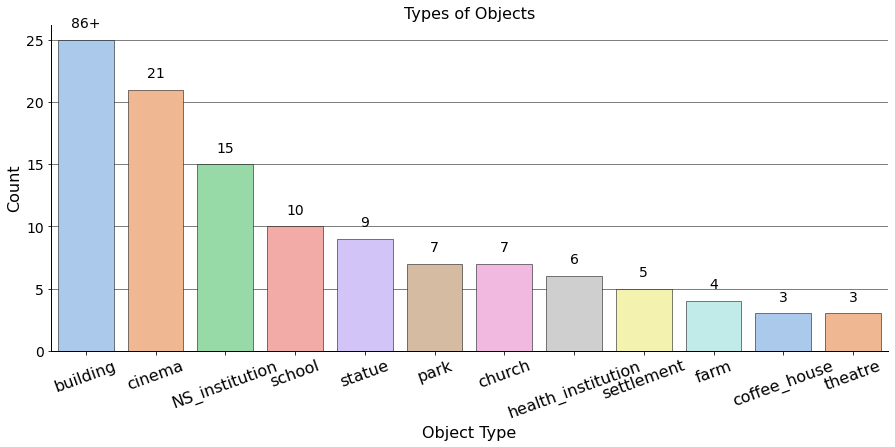

In [28]:


# Set up the plot
plt.style.use('ggplot')
fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor('white')


# Prepare the data
type_counts = aggregated_df.TYPE.value_counts()
upper_bound = 25
bar_heights = [count if count <= upper_bound else upper_bound for count in type_counts]
count_labels = [f'{count}' if count <= upper_bound else f'{count}+' for count in type_counts]

# Create the bar plot
sns.barplot(x=type_counts.index,
            y=bar_heights,
            palette=sns.color_palette('pastel'),
            edgecolor='black')

# Add count labels on top of the bars
for i, height in enumerate(bar_heights):
    ax.text(i, height + 1, count_labels[i], ha='center', fontsize=14)

# Customize the plot aesthetics
fig.set_size_inches(15, 6)
ax.set_ylabel('Count', fontsize=16, color='black')
ax.set_xlabel('Object Type', fontsize=16, color='black')
ax.set_title('Types of Objects', fontsize=16, color='black')
ax.tick_params(axis='both', which='major', labelsize=14, colors='black')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=20, color='black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.grid(axis='y', color='black', linestyle='-', linewidth=0.5)
ax.yaxis.grid(True)


# Save the plot
plt.savefig("./plots/types.pdf", bbox_inches="tight")


In [143]:
aggregated_df.TYPE.value_counts()

building              86
cinema                21
NS_institution        15
school                10
statue                 9
park                   7
church                 7
health_institution     6
settlement             5
farm                   4
coffee_house           3
theatre                3
Name: TYPE, dtype: int64

In [137]:
aggregated_df.to_csv("../data/district_data.csv", sep =";", index_label=False)

In [3]:
aggregated_df= pd.read_csv("../data/district_data.csv", sep=";")

In [142]:
print("available records: ", aggregated_df.notnull().sum(axis = 0).sum())
print("missing values: ", aggregated_df.isnull().sum(axis = 0).sum())
print(aggregated_df.shape)

available records:  1584
missing values:  0
(176, 9)


## Analysis of Development over Time

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


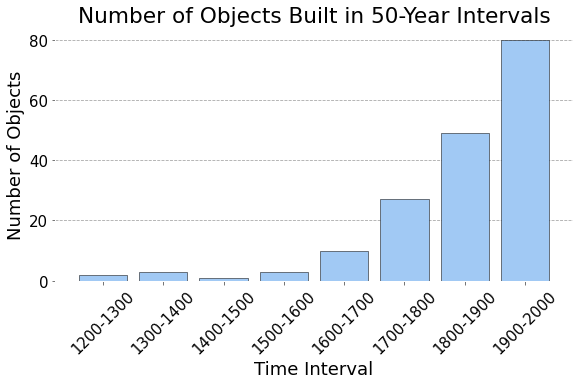

In [29]:
intervals = [(year, year+101) for year in range(1200, 2000, 100)]


# set main font size for matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

counts = []
for interval in intervals:
    count = ((aggregated_df['date_of_origin'] >= interval[0]) & (aggregated_df['date_of_origin'] < interval[1])).sum()
    counts.append(count)

plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.set_facecolor('white')

bar_color = sns.color_palette('pastel')[0]  # Use pastel blue color
bar_border_color = 'black'

bars = plt.bar(range(len(intervals)), counts, align='center', color=bar_color, edgecolor=bar_border_color)
plt.xticks(range(len(intervals)), [f"{interval[0]}-{interval[1]-1}" for interval in intervals], rotation=45)

plt.tight_layout()

plt.xlabel('Time Interval', color='black')  # Set label color to black
plt.ylabel('Number of Objects', color='black')  # Set label color to black
plt.title('Number of Objects Built in 50-Year Intervals', color='black')  # Set title color to black

# Set tick label color to black
plt.tick_params(axis='both', which='major', labelcolor='black')

# Set bar border color to black
for bar in bars:
    bar.set_edgecolor(bar_border_color)

plt.grid(axis="y", color="grey", linestyle="--", alpha=0.7)
ax.yaxis.grid(True)  # Display y-axis gridlines


# Save the plot
plt.savefig("./plots/tempraldevelopment.pdf", bbox_inches="tight")


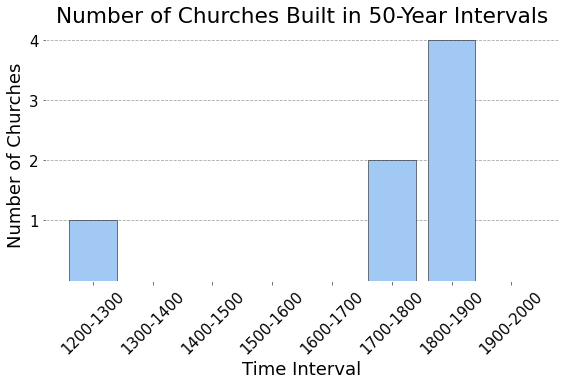

In [31]:
intervals = [(year, year+101) for year in range(1200, 2000, 100)]

counts = []
for interval in intervals:
    count = ((aggregated_df['date_of_origin'] >= interval[0]) &
             (aggregated_df['date_of_origin'] < interval[1]) &
             (aggregated_df['TYPE'] == "church")).sum()
    counts.append(count)

plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.set_facecolor('white')

bar_color = sns.color_palette('pastel')[0]  # Use pastel blue color
bar_border_color = 'black'

bars = plt.bar(range(len(intervals)), counts, align='center', color=bar_color, edgecolor=bar_border_color)
plt.xticks(range(len(intervals)), [f"{interval[0]}-{interval[1]-1}" for interval in intervals], rotation=45)

plt.tight_layout()

plt.xlabel('Time Interval', color='black')  # Set label color to black
plt.ylabel('Number of Churches', color='black')  # Set label color to black
plt.title('Number of Churches Built in 50-Year Intervals', color='black')  # Set title color to black

# Set tick label color to black
plt.tick_params(axis='both', which='major', labelcolor='black')

# Set bar border color to black
for bar in bars:
    bar.set_edgecolor(bar_border_color)

plt.grid(axis="y", color="grey", linestyle="--", alpha=0.7)
ax.yaxis.grid(True)  # Display y-axis gridlines

plt.yticks([1, 2, 3, 4])  # Set specific y-axis ticks

# Save the plot
plt.savefig("./plots/tempraldevelopmentchurch.pdf", bbox_inches="tight")

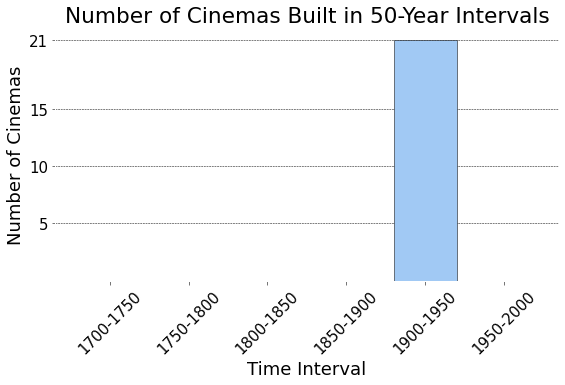

In [30]:
intervals = [(year, year+51) for year in range(1700, 2000, 50)]

counts = []
for interval in intervals:
    count = ((aggregated_df['date_of_origin'] >= interval[0]) &
             (aggregated_df['date_of_origin'] < interval[1]) &
             (aggregated_df['TYPE'] == "cinema")).sum()
    counts.append(count)

plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.set_facecolor('white')

bar_color = sns.color_palette('pastel')[0]  # Use pastel blue color
bar_border_color = 'black'

bars = plt.bar(range(len(intervals)), counts, align='center', color=bar_color, edgecolor=bar_border_color)
plt.xticks(range(len(intervals)), [f"{interval[0]}-{interval[1]-1}" for interval in intervals], rotation=45)

plt.tight_layout()

plt.xlabel('Time Interval', color='black')  # Set label color to black
plt.ylabel('Number of Cinemas', color='black')  # Set label color to black
plt.title('Number of Cinemas Built in 50-Year Intervals', color='black')  # Set title color to black

# Set tick label color to black
plt.tick_params(axis='both', which='major', labelcolor='black')

# Set bar border color to black
for bar in bars:
    bar.set_edgecolor(bar_border_color)

plt.grid(axis="y", color="black", linestyle="--", linewidth=0.5)
ax.yaxis.grid(True)  # Display y-axis gridlines

plt.yticks([5, 10, 15,21])  # Set specific y-axis ticks

# Save the plot
plt.savefig("./plots/tempraldevelopmentcinema.pdf", bbox_inches="tight")

plt.show()


